In [1]:
# impor library yang dibutuhkan
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# impor dataset
pemkomedan = pd.read_csv('../raw-datasets/Dataset-PemkoMedan.csv', delimiter=';', decimal=',')

In [3]:
# cek total data
pemkomedan.count()

L/P           314
Umur (bln)    314
BB (Kg)       314
Tb (Cm)       313
dtype: int64

In [4]:
# cek tipe data
pemkomedan.dtypes

L/P           object
Umur (bln)    object
BB (Kg)       object
Tb (Cm)       object
dtype: object

In [5]:
# ubah nama fitur
pemkomedan.rename(columns={"L/P":"jenisKelamin", "Umur (bln)":"umur", "BB (Kg)":"beratBadan", "Tb (Cm)":"tinggiBadan"}, inplace=True)

In [6]:
# cek data label jenisKelamin
pemkomedan.jenisKelamin.unique()

array(['P', 'L', 'lk', 'pr', 'L ', 'p'], dtype=object)

In [7]:
# selaraskan label jenisKelamin
pemkomedan.jenisKelamin = pemkomedan.jenisKelamin.replace(['pr', 'p'], 'P')
pemkomedan.jenisKelamin = pemkomedan.jenisKelamin.replace(['lk', 'L '], 'L')

In [8]:
# cek data label umur
pemkomedan.umur.unique()

array(['44', '42', '37', '36', '29', '23', '56', '35', '45', '18',
       '37 Bln', '24Bin', '43Bln', '48Bln', '52 Bln', '58 Bln', '56Bln',
       '51 Bln', '38Bln', '49Bln', '15Bln', '22 BLn', '55', '16', '15',
       '26', '32', '48', '52', '14', '41', '39', '33', '34', '40', '47',
       '50', '24', '17', '28', '31', '19', '20', '58', '46', '43', '30',
       '22', '6', '51', '57', '21', '38', '49', '59', '60', 'LEWATUMUR',
       '25', '13', '27', '53', '1', '7', '54', '34 Bulan', '29 Bulan',
       '50 Bulan', '44 Bulan', '39 Bulan', '47 Bln', '49 Bln', '13 Bln',
       '53 Bln', '27 Bln', '38 Bln', '36 Bln', '56 Bln', '16 Bln',
       '17 Bln', '43 Bln', '20 Bln', '19 Bln', '45 Bln'], dtype=object)

In [9]:
# memperbaiki label umur
clean_umur_1 = pemkomedan.loc[pemkomedan.umur.str.contains('Bln|Bin|BLn'), 'umur'].str[0:-3].str.replace(' ', '')
clean_umur_2 = pemkomedan.loc[pemkomedan.umur.str.contains('Bulan'), 'umur'].str[0:-5].str.replace(' ', '')
# mengganti nilai umur
pemkomedan.loc[pemkomedan.umur.str.contains('Bln|Bin|BLn'), 'umur'] = clean_umur_1
pemkomedan.loc[pemkomedan.umur.str.contains('Bulan'), 'umur'] = clean_umur_2

In [10]:
# ubah LEWATUMUR menjadi nan
pemkomedan.umur = pemkomedan.umur.replace('LEWATUMUR', np.nan)
# cari nilai mean
umur_notNa = pemkomedan.loc[pemkomedan.umur.notna(),'umur']
mean_umur = umur_notNa.astype('int64').mean().round()
# isi nilai nan menggunakan mean
pemkomedan.umur = pemkomedan.umur.fillna(mean_umur)
pemkomedan.umur = pemkomedan.umur.astype('int64')

In [11]:
# cek data label tinggiBadan
pemkomedan.tinggiBadan.unique()

array(['90,5', '94', '88', '84,5', '86', '81,5', '76,5', '85', '86.5',
       '84', '92.5', '74.5', '84cm', '77.5 cm', '88.5 cm', '91.2 cm',
       '91 cm', '98cm', '90 cm', '92.5 cm', '85 cm', '93 cm', '85cm',
       '68cm', '74 cm', '93,5', '72', '69', '79', '89', '74', '92', '78',
       '70', '64', '87', '91,5', '93', '99', '88,5', '96', '74,5', '83',
       '86,5', '81', '76', '73,4', '80,5', '87,1', '84,1', '85,7', '92,7',
       '68', '90', '83,5', '73', '72,5', '91', '81.2', '60', '89,5', '95',
       '96,5', '100,2', '82', nan, 'LEWATUMUR', '80', '75,5', '92,5',
       '75', '98', '77', '867', '94,5', '81,2', '884', '81,6', '94,6',
       '67', '87,5', '57', '93,3', '88,1', '78,2', '71'], dtype=object)

In [12]:
# isi nilai nan untuk mencegah eror
pemkomedan.tinggiBadan = pemkomedan.tinggiBadan.fillna('LEWATUMUR')

In [13]:
# memperbaiki label tinggiBadan
clean_tinggiBadan = pemkomedan.loc[pemkomedan.tinggiBadan.str.contains('cm'),'tinggiBadan'].str[0:-2].str.replace(' ', '')
# mengganti nilai tinggibadan 
pemkomedan.loc[pemkomedan.tinggiBadan.str.contains('cm'), 'tinggiBadan'] = clean_tinggiBadan
# mengganti koma menjadi titik
pemkomedan.tinggiBadan = pemkomedan.tinggiBadan.str.replace(',', '.')

In [14]:
# mengubah LEWATUMUR dengan nan
pemkomedan.tinggiBadan = pemkomedan.tinggiBadan.replace('LEWATUMUR', np.nan)
# mencari nilai mean
tinggi_notNa = pemkomedan.loc[pemkomedan.tinggiBadan.notna()]
mean_tinggi = tinggi_notNa.tinggiBadan.astype('float64').mean().round(1)
# mengisi nilai na dengan nilai mean
pemkomedan.tinggiBadan = pemkomedan.tinggiBadan.fillna(mean_tinggi)
pemkomedan.tinggiBadan = pemkomedan.tinggiBadan.astype('float64')

In [15]:
# cek data label tinggiBadan
pemkomedan.beratBadan.unique()

array(['13', '12,2', '10', '9,7', '11', '7,2', '9.4', '13.2', '11.5',
       '7.5', '9.4kg', '9 kg', '11.5kg', '12.2kg', '11.9kg', '12kg',
       '12 kg', '11,5 kg', '11.5KG', '11.4 kg', '10.2KG', '5.6 Kg',
       '7 .3kg', '12', '6.9', '6.5', '8', '9.9', '7', '11,5', '11,2',
       '11,7', '9,3', '8,4', '5,7', '9,2', '10,3', '11,3', '10,9', '12,3',
       '12,8', '10,4', '8,8', '11,8', '9,1', '8.4', '10,1', '9', '10,8',
       '11,4', '7,8', '8,7', '14', '8.7', '10,5', '12,5', '13.5', '6,5',
       '12.5', '8.5', '14,2', '14,3', '5.4', '10,7', '13,2', '12,1',
       '14,4', '10,6', '12,9', '9,9', '8,9', '14,8', '14,6', '9,8',
       'LEWATUMUR', '11,6', '10,2', '8,3', '8,6', '8,5', '7,7', '6,6',
       '7,3', '9,5', '13,5', '9,6', '8.3', '10.3', '6,8', '11,35', '9,45',
       '12,6', '8,2', '11,9', '6,7', '5', '7,1', '9,4', '13.7', '13.6',
       '7.7', '13.0', '13.3', '9.5', '11.8', '7.8', '14.7', '8.0', '9.0',
       '11.2', '6.3', '10.2', '10.1', '13.8', '7.2', '9.2', '7.3', '7,9',

In [16]:
# isi nilai nan untuk mencegah eror
pemkomedan.beratBadan = pemkomedan.beratBadan.fillna('LEWATUMUR')

In [17]:
# memperbaiki label beratBadan
clean_beratBadan = pemkomedan.loc[pemkomedan.beratBadan.str.contains('kg|Kg|KG'),'beratBadan'].str[0:-2].str.replace(' ', '')
# mengganti nilai beratBadan 
pemkomedan.loc[pemkomedan.beratBadan.str.contains('kg|Kg|KG'), 'beratBadan'] = clean_beratBadan
# mengganti koma menjadi titik
pemkomedan.beratBadan = pemkomedan.beratBadan.str.replace(',', '.')

In [18]:
# mengubah LEWATUMUR dengan nan
pemkomedan.beratBadan = pemkomedan.beratBadan.replace('LEWATUMUR', np.nan)
# mencari nilai mean
berat_notNa = pemkomedan.loc[pemkomedan.beratBadan.notna()]
mean_berat = berat_notNa.beratBadan.astype('float64').mean().round(1)
# mengisi nilai na dengan nilai mean
pemkomedan.beratBadan = pemkomedan.beratBadan.fillna(mean_berat)
pemkomedan.beratBadan = pemkomedan.beratBadan.astype('float64')

In [19]:
# cek tipe data
pemkomedan.dtypes

jenisKelamin     object
umur              int64
beratBadan      float64
tinggiBadan     float64
dtype: object

In [20]:
# hapus noise pada seluruh fitur
noise_umur = pemkomedan.loc[(pemkomedan.umur < 0) | (pemkomedan.umur > 60)]
pemkomedan.drop(index = noise_umur.index, inplace=True)
noise_berat = pemkomedan.loc[(pemkomedan.beratBadan < 1.9) | (pemkomedan.beratBadan > 31.2)]
pemkomedan.drop(index = noise_berat.index, inplace=True)
noise_tinggi = pemkomedan.loc[(pemkomedan.tinggiBadan < 43.6 ) | (pemkomedan.tinggiBadan > 123.9)]
pemkomedan.drop(index = noise_tinggi.index, inplace=True)

In [21]:
# cari outlier umur dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_umur = pemkomedan.umur.quantile(0.25)
Q3_umur = pemkomedan.umur.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_umur = Q3_umur - Q1_umur
umur_bawah = Q1_umur - 1.5 * IQR_umur
umur_atas = Q3_umur + 1.5 * IQR_umur
# mencari outlier data
outlier_umur = pemkomedan.loc[(pemkomedan.umur < umur_bawah) | (pemkomedan.umur > umur_atas)]

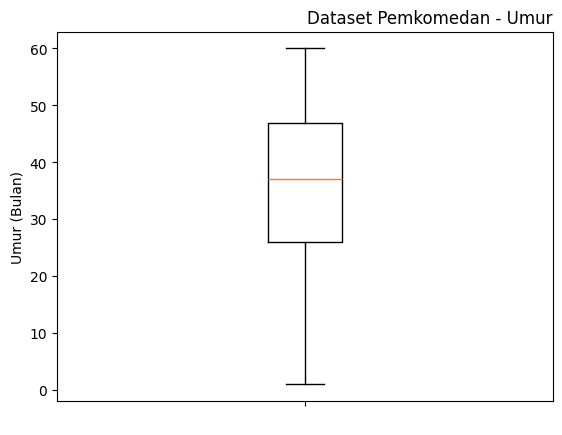

In [23]:
# visualisasi outlier age
plt.boxplot(pemkomedan.umur, tick_labels=[' '], sym='x')
plt.ylabel('Umur (Bulan)')
plt.title('Dataset Pemkomedan - Umur', loc='right')
plt.show()

In [24]:
# cari outlier beratBadan dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_berat = pemkomedan.beratBadan.quantile(0.25)
Q3_berat = pemkomedan.beratBadan.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_berat = Q3_berat - Q1_berat
berat_bawah = Q1_berat - 1.5 * IQR_berat
berat_atas = Q3_berat + 1.5 * IQR_berat
# mencari outlier data
outlier_berat = pemkomedan.loc[(pemkomedan.beratBadan < berat_bawah) | (pemkomedan.beratBadan > berat_atas)]

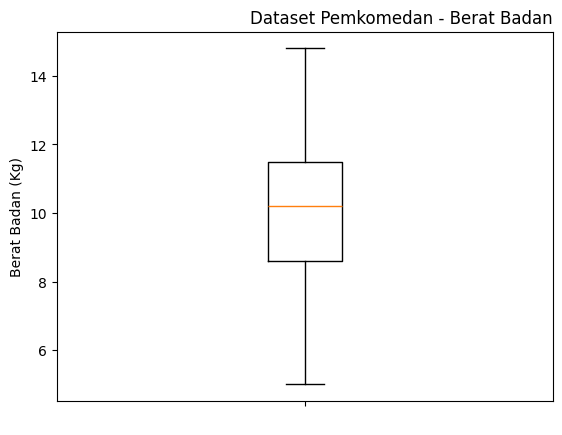

In [25]:
# visualisasi outlier beratBadan
plt.boxplot(pemkomedan.beratBadan, tick_labels=[' '], sym='x')
plt.ylabel('Berat Badan (Kg)')
plt.title('Dataset Pemkomedan - Berat Badan', loc='right')
plt.show()

In [26]:
# cari outlier tinggiBadan dataset Kaggle-2
# mencari nilai Q1 dan Q3
Q1_tinggi = pemkomedan.tinggiBadan.quantile(0.25)
Q3_tinggi = pemkomedan.tinggiBadan.quantile(0.75)
# mencari IQR, batas bawah, dan batas atas
IQR_tinggi = Q3_tinggi - Q1_tinggi
tinggi_bawah = Q1_tinggi - 1.5 * IQR_tinggi
tinggi_atas = Q3_tinggi + 1.5 * IQR_tinggi
# mencari outlier data
outlier_tinggi = pemkomedan.loc[(pemkomedan.tinggiBadan < tinggi_bawah) | (pemkomedan.tinggiBadan > tinggi_atas)]

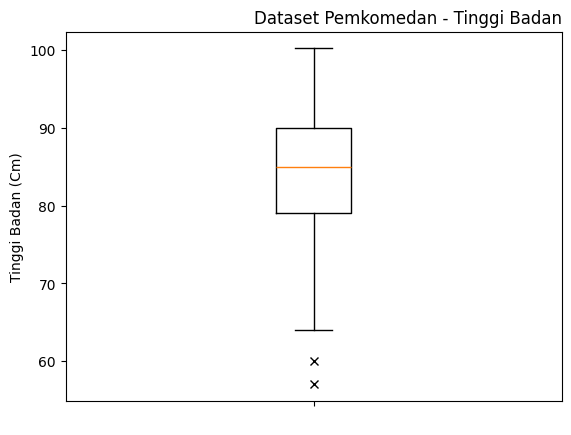

In [28]:
# visualisasi outlier beratBadan
plt.boxplot(pemkomedan.tinggiBadan, tick_labels=[' '], sym='x')
plt.ylabel('Tinggi Badan (Cm)')
plt.title('Dataset Pemkomedan - Tinggi Badan', loc='right')
plt.show()

In [29]:
# hapus data duplikat
pemkomedan.drop_duplicates(inplace=True)

In [30]:
# acak susunan dataset
pemkomedan = pemkomedan.sample(frac=1, ignore_index=True, random_state=18062025)

In [31]:
# ekspor dataset
pemkomedan.to_csv('pemkomedan-clean.csv', index=False)